In [40]:
import os,random,glob,sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
DATA_ORI = 'C:\\Users\\gcram\\Documents\\Smart Sense\\Datasets\\originals\\PAMAP2\\Protocol\\*.dat'
DATA_DIR = 'C:\\Users\\gcram\\Documents\\Smart Sense\\Datasets\\frankDataset\\'
datasetList = ['Dsads','Ucihar','Uschad','Pamap2']
n_classes = 4 

sys.path.insert(0, '../../Utils/')
from visualization import plot_sensor


### Analysing processed data:

In [65]:
myActNames = {
	'walking': 0,
	'walking forward': 0,
	'ascending stairs': 1,
	'walking up': 1,
	'descending stairs': 2,
	'walking down': 2,
	'lying':3,
	'lying on back':3,
	'lying on right':3,
	'laying':3,
	'sleeping':3,
	'sitting': 4,
	'standing': 5,
}
idx2Name = {
	0:'walking',
	1:'ascending stairs',
	2:'descending stairs',
	3:'lying',
}
def standarizeActName(y):
    y1 = list(map(lambda x: x.split('-')[-1], y))
    return np.array(list(map(lambda x: myActNames[x], y1)))

def readDataset(dataset_name,freq = 25):
    #file = os.path.join(DATA_DIR, f'{dataset_name}_f25_t2_{n_classes}actv.npz')
    file = os.path.join(DATA_DIR, f'{dataset_name}_f{freq}_t2_4actv.npz')
    with np.load(file, allow_pickle=True) as tmp:
        X = tmp['X'].astype('float32')
        y = tmp['y']
    Y = standarizeActName(y)
    return X[:,0,:,:],Y

In [64]:
# dataset_name = "Uschad"
# freq = 50
# file = os.path.join(DATA_DIR, f'{dataset_name}_f{freq}_t2_4actv.npz')
# with np.load(file, allow_pickle=True) as tmp:
#     X = tmp['X'].astype('float32')
#     y = tmp['y']
#     folds = tmp['folds']
# if(X.shape[-1]) !=6:
#     X = np.swapaxes(X,2,1)
#     X = np.swapaxes(X,2,3)
# outFile = os.path.join(DATA_DIR, f'{dataset_name}_f{freq}_t2_4actv.npz')
# np.savez(outFile,X = X,y=y,folds = np.array(folds))

In [73]:
x,y = readDataset("Dsads",25)
actv = pd.value_counts(y)
x.shape

(7200, 50, 6)

In [53]:
act_idx = 3

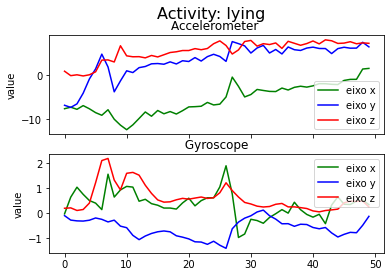

In [56]:
#filter some activity:
%matplotlib inline
x_act = x[np.where(y==act_idx)[0]]
sample = 10
plot_sensor(x_act[sample][None,:,:],idx2Name[act_idx])

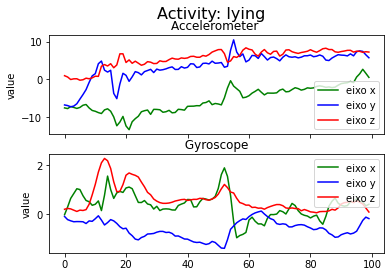

In [54]:
#filter some activity:
%matplotlib inline
x_act = x[np.where(y==act_idx)[0]]
sample = 10
plot_sensor(x_act[sample][None,:,:],idx2Name[act_idx])

In [ ]:
#filter some activity:
%matplotlib inline
act_idx = 0
x_act = x[np.where(y==act_idx)[0]]
sample = 0
plot_sensor(x_act[sample][None,:,:],idx2Name[act_idx])

In [ ]:
#filter some activity:
%matplotlib inline
act_idx = 0
x_act = x[np.where(y==act_idx)[0]]
sample = 0
plot_sensor(x_act[sample][None,:,:],idx2Name[act_idx])
